In [59]:
import re
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import os
import sys
import time
import json
from IPython.display import display
from time import strftime, gmtime

pd.options.display.float_format = '{:.6f}'.format
pd.set_option('display.max_columns', 500)


The dataset we use is publicly available at https://www.kaggle.com/mlg-ulb/creditcardfraud

In [2]:
credit_df = pd.read_csv('creditcard.csv')
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0


In [3]:
credit_df.shape

(284807, 31)

In [4]:
credit_df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
credit_df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,94813.859575,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,88.349619,0.001727
std,47488.145955,1.958696,1.651309,1.516255,1.415869,1.380247,1.332271,1.237094,1.194353,1.098632,1.088850,1.020713,0.999201,0.995274,0.958596,0.915316,0.876253,0.849337,0.838176,0.814041,0.770925,0.734524,0.725702,0.624460,0.605647,0.521278,0.482227,0.403632,0.330083,250.120109,0.041527
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54201.500000,-0.920373,-0.598550,-0.890365,-0.848640,-0.691597,-0.768296,-0.554076,-0.208630,-0.643098,-0.535426,-0.762494,-0.405571,-0.648539,-0.425574,-0.582884,-0.468037,-0.483748,-0.498850,-0.456299,-0.211721,-0.228395,-0.542350,-0.161846,-0.354586,-0.317145,-0.326984,-0.070840,-0.052960,5.600000,0.000000
50%,84692.000000,0.018109,0.065486,0.179846,-0.019847,-0.054336,-0.274187,0.040103,0.022358,-0.051429,-0.092917,-0.032757,0.140033,-0.013568,0.050601,0.048072,0.066413,-0.065676,-0.003636,0.003735,-0.062481,-0.029450,0.006782,-0.011193,0.040976,0.016594,-0.052139,0.001342,0.011244,22.000000,0.000000
75%,139320.500000,1.315642,0.803724,1.027196,0.743341,0.611926,0.398565,0.570436,0.327346,0.597139,0.453923,0.739593,0.618238,0.662505,0.493150,0.648821,0.523296,0.399675,0.500807,0.458949,0.133041,0.186377,0.528554,0.147642,0.439527,0.350716,0.240952,0.091045,0.078280,77.165000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [6]:
print('The number of Non-Frauds are: ' + str(credit_df['Class'].value_counts()[0]) + ' which is ', round(credit_df['Class'].value_counts()[0]/len(credit_df) * 100,2), '% of the dataset')
print('The number of Frauds are: ' + str(credit_df['Class'].value_counts()[1]) + ' which is ', round(credit_df['Class'].value_counts()[1]/len(credit_df) * 100,2), '% of the dataset')

The number of Non-Frauds are: 284315 which is  99.83 % of the dataset
The number of Frauds are: 492 which is  0.17 % of the dataset


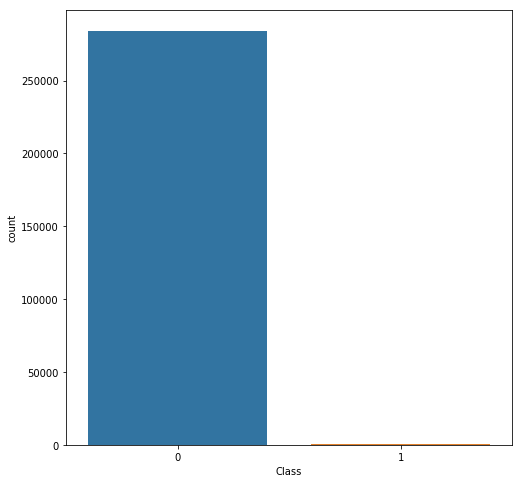

In [7]:
plt.figure(figsize=(8, 8))
sns.countplot('Class', data=credit_df)

In [8]:
credit_df.isna().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

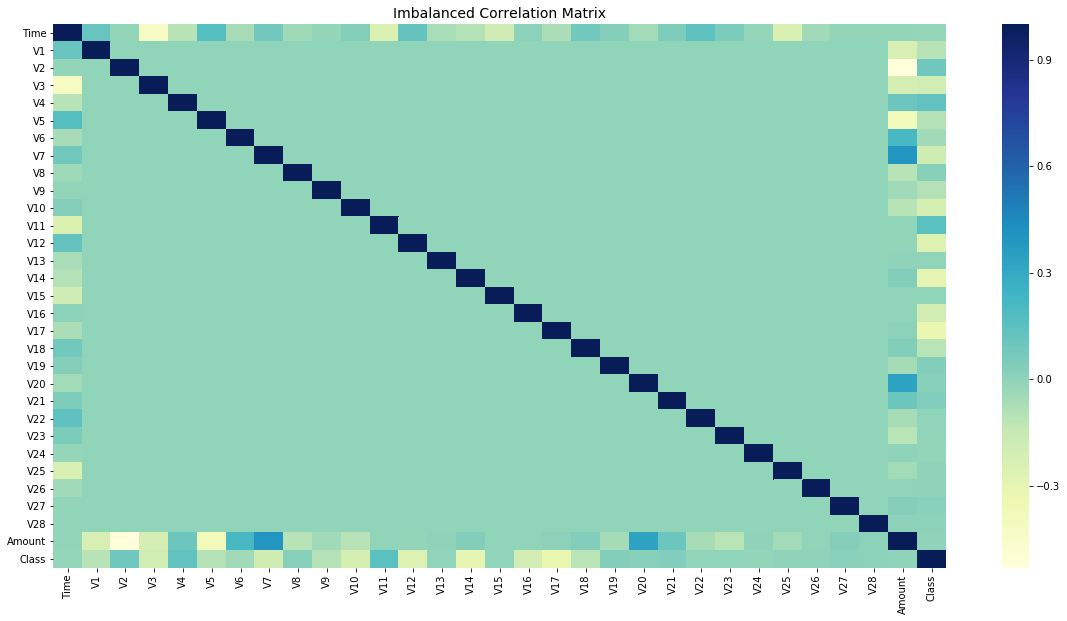

In [9]:
# Sample figsize in inches
fig, ax = plt.subplots(figsize=(20,10))         

# Imbalanced DataFrame Correlation
corr = credit_df.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)

plt.show()

In [10]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler

# RobustScaler is robust to outliers.

credit_df['amount_after_scaling'] = StandardScaler().fit_transform(credit_df['Amount'].values.reshape(-1,1))
credit_df['time_after_scaling'] = StandardScaler().fit_transform(credit_df['Time'].values.reshape(-1,1))

credit_df.drop(['Time','Amount'], axis=1, inplace=True)

# Place the class in the begining of the dataframe
Class = credit_df['Class']
credit_df.drop(['Class'], axis=1, inplace=True)
credit_df.insert(0, 'Class', Class)

In [11]:
credit_df.describe()


,Class,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,amount_after_scaling,time_after_scaling
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,0.001727,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000
std,0.041527,1.958696,1.651309,1.516255,1.415869,1.380247,1.332271,1.237094,1.194353,1.098632,1.088850,1.020713,0.999201,0.995274,0.958596,0.915316,0.876253,0.849337,0.838176,0.814041,0.770925,0.734524,0.725702,0.624460,0.605647,0.521278,0.482227,0.403632,0.330083,1.000002,1.000002
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,-0.353229,-1.996583
25%,0.000000,-0.920373,-0.598550,-0.890365,-0.848640,-0.691597,-0.768296,-0.554076,-0.208630,-0.643098,-0.535426,-0.762494,-0.405571,-0.648539,-0.425574,-0.582884,-0.468037,-0.483748,-0.498850,-0.456299,-0.211721,-0.228395,-0.542350,-0.161846,-0.354586,-0.317145,-0.326984,-0.070840,-0.052960,-0.330840,-0.855212
50%,0.000000,0.018109,0.065486,0.179846,-0.019847,-0.054336,-0.274187,0.040103,0.022358,-0.051429,-0.092917,-0.032757,0.140033,-0.013568,0.050601,0.048072,0.066413,-0.065676,-0.003636,0.003735,-0.062481,-0.029450,0.006782,-0.011193,0.040976,0.016594,-0.052139,0.001342,0.011244,-0.265271,-0.213145
75%,0.000000,1.315642,0.803724,1.027196,0.743341,0.611926,0.398565,0.570436,0.327346,0.597139,0.453923,0.739593,0.618238,0.662505,0.493150,0.648821,0.523296,0.399675,0.500807,0.458949,0.133041,0.186377,0.528554,0.147642,0.439527,0.350716,0.240952,0.091045,0.078280,-0.044717,0.937217
max,1.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,102.362243,1.642058


In [12]:
# Shuffle the Dataset.
shuffled_df = credit_df.sample(frac=1,random_state=4)

# amount of fraud classes 492 rows.
fraud_df = shuffled_df.loc[shuffled_df['Class'] == 1]

#Randomly select 492 observations.
non_fraud_df = shuffled_df.loc[shuffled_df['Class'] == 0].sample(n=492,random_state=42)
normalized_df = pd.concat([fraud_df, non_fraud_df])

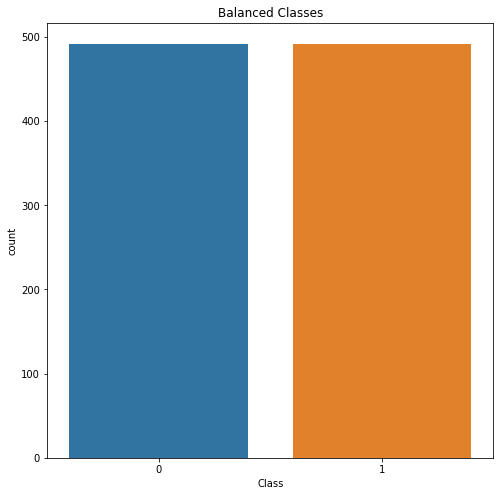

In [13]:

plt.figure(figsize=(8, 8))
sns.countplot('Class', data=normalized_df)
plt.title('Balanced Classes')
plt.show()

In [14]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(ratio='minority', random_state=7)

oversampled_trainX, oversampled_trainY = sm.fit_sample(credit_df.drop('Class', axis=1), credit_df['Class'])
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)
oversampled_train.columns = normalized_df.columns

In [15]:
normalized_df.head()


,Class,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,amount_after_scaling,time_after_scaling
9179,1,-2.880042,5.225442,-11.063330,6.689951,-5.759924,-2.244031,-11.199975,4.014722,-3.429304,-11.561950,10.446847,-15.479052,0.734442,-13.883779,0.821440,-11.911483,-18.103004,-6.837835,3.126929,1.191444,2.002883,0.351102,0.795255,-0.778379,-1.646815,0.487539,1.427713,0.583172,-0.349231,-1.720177
223618,1,-2.006582,3.676577,-5.463811,7.232058,-1.627859,-0.996755,-4.299833,2.268867,-3.651067,-4.400930,4.213213,-5.737815,-0.875693,-8.893726,-0.562434,-3.281784,-4.368986,-0.736734,1.609293,0.474414,0.713907,-0.063868,0.167947,-0.449864,0.023702,0.536905,0.485864,-0.042393,-0.349231,1.024302
9487,1,-4.153014,8.204797,-15.031714,10.330100,-3.994426,-3.250013,-10.415698,4.620804,-5.711248,-11.797181,11.277921,-16.728339,0.241368,-17.721638,-0.387300,-10.322017,-13.959085,-5.030710,1.197266,1.412625,1.976988,0.256510,0.485908,-1.198821,-0.526567,0.634874,1.627209,0.723235,-0.349231,-1.700235
10497,1,1.189784,0.942289,0.082334,3.024050,0.412406,-0.214415,0.053558,-0.110353,0.883798,-0.554224,0.154921,-2.776757,1.641207,-0.456077,-1.240414,0.857323,1.707024,0.526349,-0.865105,-0.143435,-0.502636,-1.047398,-0.056752,-0.340688,0.541235,-0.098300,-0.003041,0.049819,-0.338077,-1.633966
250761,1,-0.512349,4.827060,-7.973939,7.334059,0.367704,-2.055129,-2.935856,1.431008,-4.544722,-5.258096,5.716319,-5.810407,0.723293,-12.289133,0.378773,-2.020734,-2.039703,0.658183,0.832574,0.804101,0.535620,-0.459496,-0.009364,-1.140436,-0.006445,0.527970,0.558881,0.126517,-0.350151,1.268532


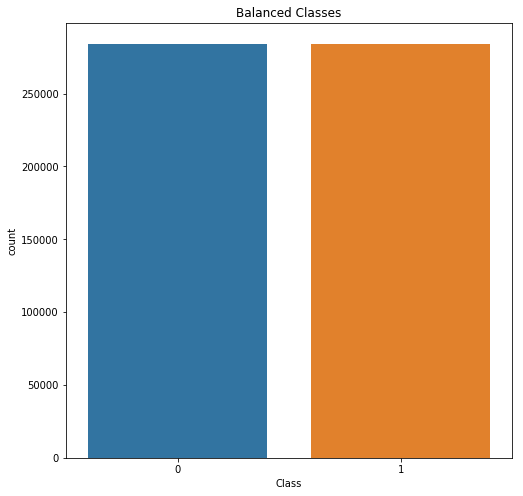

In [16]:
plt.figure(figsize=(8, 8))
sns.countplot('Class', data=oversampled_train)
plt.title('Balanced Classes')
plt.show()

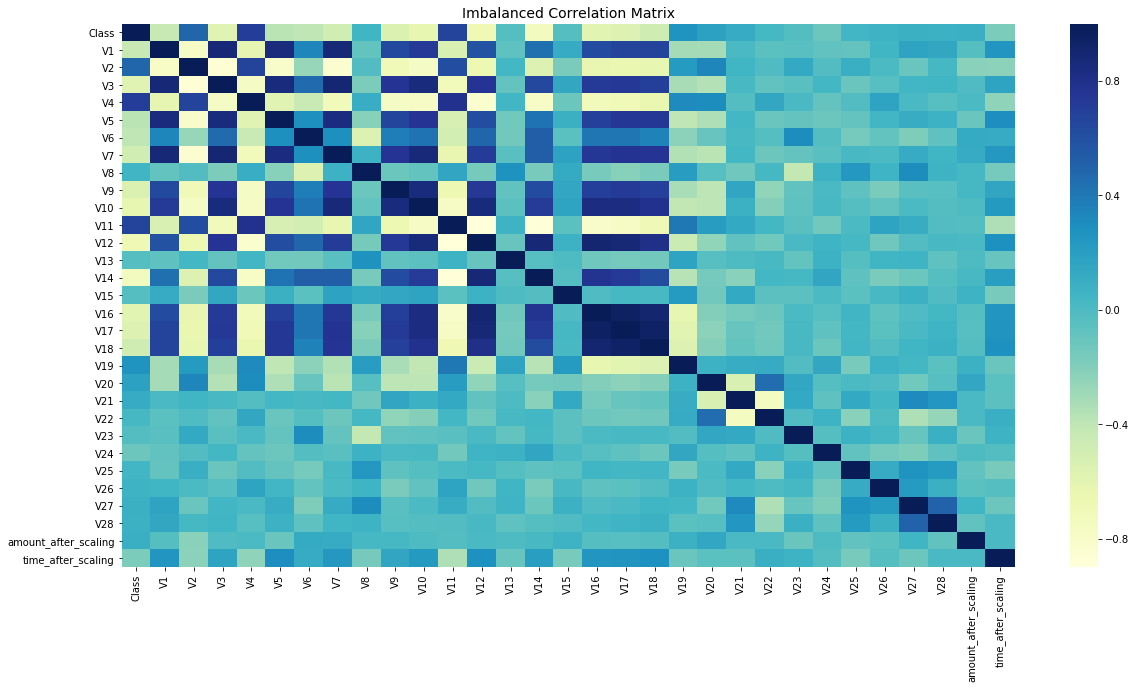

In [17]:
fig, ax = plt.subplots(figsize=(20,10))         

# Imbalanced DataFrame Correlation
corr = normalized_df.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)

plt.show()

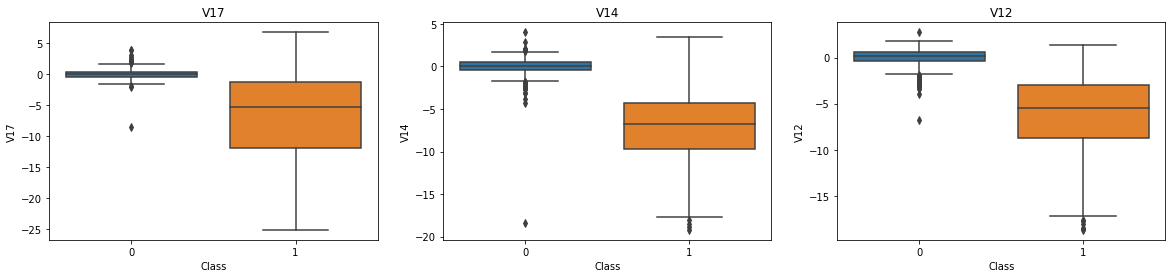

In [18]:
fig, axes = plt.subplots(ncols=3, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=normalized_df, ax=axes[0])
axes[0].set_title('V17')

sns.boxplot(x="Class", y="V14", data=normalized_df, ax=axes[1])
axes[1].set_title('V14')


sns.boxplot(x="Class", y="V12", data=normalized_df, ax=axes[2])
axes[2].set_title('V12')


plt.show()

In [19]:
V17_non_fraud = normalized_df.query('V17 > -7 & Class == 0')
V17_fraud = normalized_df.query('Class == 1')
normalized_df_no_outlier = pd.concat([V17_non_fraud,V17_fraud])

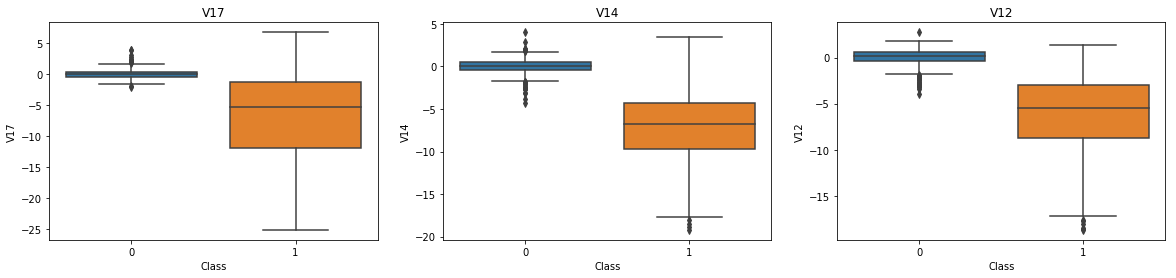

In [20]:
fig, axes = plt.subplots(ncols=3, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=normalized_df_no_outlier, ax=axes[0])
axes[0].set_title('V17')

sns.boxplot(x="Class", y="V14", data=normalized_df_no_outlier, ax=axes[1])
axes[1].set_title('V14')


sns.boxplot(x="Class", y="V12", data=normalized_df_no_outlier, ax=axes[2])
axes[2].set_title('V12')


plt.show()

In [21]:
shuffled_normalized_df = normalized_df.sample(frac=1)
shuffled_normalized_df.head()

,Class,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,amount_after_scaling,time_after_scaling
184494,0,1.911708,-1.414311,-0.619224,-0.606060,-1.342141,-0.714071,-0.789843,-0.069170,0.364332,0.623053,-1.116129,-1.013178,-1.314238,-0.203580,-0.242260,0.959856,0.498967,-1.727078,0.837087,0.102652,-0.152349,-0.699546,0.332677,-0.152240,-0.580186,-0.573609,-0.020618,-0.025816,0.184313,0.662359
51897,0,1.311606,-0.871187,0.223754,-0.757016,-0.916639,0.043854,-0.849833,0.108686,-0.360428,0.652657,-1.332056,-1.170113,-0.983187,0.211493,1.587630,-1.024667,-0.089248,1.218193,-0.984557,-0.483149,-0.290858,-0.458823,-0.052381,-0.767679,0.145845,1.181916,-0.042029,0.005169,-0.157723,-1.045228
88307,1,-1.599457,2.607720,-2.987193,3.064156,-2.497914,-0.541103,-2.277786,1.268166,-1.997331,-3.834775,1.113354,-4.976921,-0.795531,-4.549557,1.813763,-3.177460,-5.369349,-1.121454,2.030592,0.225333,0.662933,0.184087,-0.089452,-0.506000,-0.062259,-0.052714,0.322854,0.135268,0.366426,-0.689307
85089,0,1.095745,0.248453,0.518142,1.286312,-0.302006,-0.598830,0.168765,-0.093645,-0.104884,-0.021755,0.173161,0.496585,0.074547,0.392434,1.111830,-0.217323,-0.059939,-0.904595,-0.824380,-0.105336,-0.104010,-0.335273,0.085602,0.380235,0.341071,-0.531270,0.028473,0.032722,-0.193386,-0.720515
6820,1,-2.169929,3.639654,-4.508498,2.730668,-2.122693,-2.341017,-4.235253,1.703538,-1.305279,-6.716720,6.353612,-8.601648,0.449930,-7.506169,-0.438082,-3.694516,-6.304753,-1.267587,0.357987,0.500779,0.645103,-0.503529,-0.000523,0.071696,0.092007,0.308498,0.552591,0.298954,-0.349231,-1.815190


In [22]:
train_data, validation_data, test_data = np.split(shuffled_normalized_df, [int(0.7 * len(shuffled_normalized_df)), int(0.9 * len(shuffled_normalized_df))])
train_data.to_csv('train.csv', header=False, index=False)
validation_data.to_csv('validation.csv', header=False, index=False)

In [23]:
train_data

,Class,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,amount_after_scaling,time_after_scaling
184494,0,1.911708,-1.414311,-0.619224,-0.606060,-1.342141,-0.714071,-0.789843,-0.069170,0.364332,0.623053,-1.116129,-1.013178,-1.314238,-0.203580,-0.242260,0.959856,0.498967,-1.727078,0.837087,0.102652,-0.152349,-0.699546,0.332677,-0.152240,-0.580186,-0.573609,-0.020618,-0.025816,0.184313,0.662359
51897,0,1.311606,-0.871187,0.223754,-0.757016,-0.916639,0.043854,-0.849833,0.108686,-0.360428,0.652657,-1.332056,-1.170113,-0.983187,0.211493,1.587630,-1.024667,-0.089248,1.218193,-0.984557,-0.483149,-0.290858,-0.458823,-0.052381,-0.767679,0.145845,1.181916,-0.042029,0.005169,-0.157723,-1.045228
88307,1,-1.599457,2.607720,-2.987193,3.064156,-2.497914,-0.541103,-2.277786,1.268166,-1.997331,-3.834775,1.113354,-4.976921,-0.795531,-4.549557,1.813763,-3.177460,-5.369349,-1.121454,2.030592,0.225333,0.662933,0.184087,-0.089452,-0.506000,-0.062259,-0.052714,0.322854,0.135268,0.366426,-0.689307
85089,0,1.095745,0.248453,0.518142,1.286312,-0.302006,-0.598830,0.168765,-0.093645,-0.104884,-0.021755,0.173161,0.496585,0.074547,0.392434,1.111830,-0.217323,-0.059939,-0.904595,-0.824380,-0.105336,-0.104010,-0.335273,0.085602,0.380235,0.341071,-0.531270,0.028473,0.032722,-0.193386,-0.720515
6820,1,-2.169929,3.639654,-4.508498,2.730668,-2.122693,-2.341017,-4.235253,1.703538,-1.305279,-6.716720,6.353612,-8.601648,0.449930,-7.506169,-0.438082,-3.694516,-6.304753,-1.267587,0.357987,0.500779,0.645103,-0.503529,-0.000523,0.071696,0.092007,0.308498,0.552591,0.298954,-0.349231,-1.815190
6899,1,-2.661802,5.856393,-7.653616,6.379742,-0.060712,-3.131550,-3.103570,1.778492,-3.831154,-7.191604,7.102989,-9.928700,-0.067498,-10.924187,-1.697914,-2.379421,-2.775114,0.273799,-1.382188,0.399097,0.734775,-0.435901,-0.384766,-0.286016,1.007934,0.413196,0.280284,0.303937,-0.349231,-1.809631
237107,1,1.184891,3.152084,-6.134780,5.531252,1.733867,-1.816861,-0.916696,0.265568,-3.158014,-3.890169,4.736594,-4.162115,-0.456697,-10.266758,-0.583018,0.513471,0.113665,1.488620,-1.805577,0.336442,0.124236,-0.823865,-0.079887,0.028828,0.389711,0.060171,0.485187,0.326552,-0.353229,1.143069
152850,0,2.006738,-0.531416,-0.326853,0.097868,-0.213730,0.888744,-1.165886,0.264291,2.502797,-0.221987,0.752132,-1.980397,1.750378,1.269631,-0.524960,1.180965,-0.555757,1.206823,0.192066,-0.144349,-0.140079,-0.093488,0.218735,-0.390851,-0.498788,0.455980,-0.051683,-0.057483,-0.289460,0.056249
74386,0,-3.437682,2.898084,-0.603109,-0.652411,-0.681671,-0.382456,-0.313152,1.180753,0.567315,1.973590,0.519032,1.169200,0.908406,0.283367,0.206819,0.740224,-0.671866,0.274448,0.393208,0.744053,-0.439246,-0.741052,0.183409,-0.526520,0.395210,0.117327,0.501993,0.168325,-0.317367,-0.826731
226814,1,-2.405207,2.943823,-7.616654,3.533374,-5.417494,-0.112632,-1.329372,1.709417,-2.322716,-6.540989,4.404578,-4.938159,-0.740985,-7.462961,0.534968,-4.671032,-4.472403,-0.982090,3.490069,-0.338707,0.652683,0.414132,0.023869,-0.260616,0.405316,0.029107,0.519807,-0.469537,2.315693,1.052773


In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
model = LogisticRegression()

In [27]:
model.fit(train_data.drop(columns="Class"),train_data.Class)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
train_pred = model.predict(train_data.drop(columns="Class"))

In [30]:
import sklearn.metrics as metrics

In [31]:
metrics.confusion_matrix(train_pred,train_data.Class)

array([[343,  24],
       [  6, 315]])

In [35]:
metrics.accuracy_score(train_pred,train_data.Class)

0.9563953488372093

In [33]:
test_pred = model.predict(test_data.drop(columns="Class"))

In [34]:
metrics.confusion_matrix(test_pred,test_data.Class)

array([[44,  9],
       [ 2, 44]])

In [36]:
metrics.accuracy_score(test_pred,test_data.Class)

0.8888888888888888

In [37]:
validation_pred = model.predict(validation_data.drop(columns="Class"))

In [38]:
metrics.confusion_matrix(validation_pred,validation_data.Class)

array([[94, 10],
       [ 3, 90]])

In [39]:
metrics.accuracy_score(validation_pred,validation_data.Class)

0.934010152284264

In [41]:
from sklearn.linear_model import RidgeClassifier 

model = RidgeClassifier()

model.fit(train_data.drop(columns="Class"),train_data.Class)

train_pred = model.predict(train_data.drop(columns="Class"))

import sklearn.metrics as metrics

print(metrics.confusion_matrix(train_pred,train_data.Class))

print(metrics.accuracy_score(train_pred,train_data.Class))

test_pred = model.predict(test_data.drop(columns="Class"))

print(metrics.confusion_matrix(test_pred,test_data.Class))

print(metrics.accuracy_score(test_pred,test_data.Class))

validation_pred = model.predict(validation_data.drop(columns="Class"))

print(metrics.confusion_matrix(validation_pred,validation_data.Class))

print(metrics.accuracy_score(validation_pred,validation_data.Class))

[[342  48]
 [  7 291]]
0.9200581395348837
[[45 15]
 [ 1 38]]
0.8383838383838383
[[95 20]
 [ 2 80]]
0.8883248730964467


In [43]:
from sklearn.linear_model import Lasso 

model = Lasso()

model.fit(train_data.drop(columns="Class"),train_data.Class)

train_pred = model.predict(train_data.drop(columns="Class"))

import sklearn.metrics as metrics


In [45]:
train_pred = np.where(train_pred<0.40,0,1)

In [47]:
print(metrics.confusion_matrix(train_pred,train_data.Class))

print(metrics.accuracy_score(train_pred,train_data.Class))

test_pred = model.predict(test_data.drop(columns="Class"))

test_pred = np.where(test_pred<0.40,0,1)

print(metrics.confusion_matrix(test_pred,test_data.Class))

print(metrics.accuracy_score(test_pred,test_data.Class))

validation_pred = model.predict(validation_data.drop(columns="Class"))

validation_pred = np.where(validation_pred<0.40,0,1)

print(metrics.confusion_matrix(validation_pred,validation_data.Class))

print(metrics.accuracy_score(validation_pred,validation_data.Class))

[[320  29]
 [ 29 310]]
0.9156976744186046
[[43  9]
 [ 3 44]]
0.8787878787878788
[[92 10]
 [ 5 90]]
0.9238578680203046


In [58]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.9, copy_X=True, fit_intercept=True, l1_ratio=0.99,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

model.fit(train_data.drop(columns="Class"),train_data.Class)

train_pred = model.predict(train_data.drop(columns="Class"))

import sklearn.metrics as metrics

train_pred = np.where(train_pred<0.40,0,1)

print(metrics.confusion_matrix(train_pred,train_data.Class))

print(metrics.accuracy_score(train_pred,train_data.Class))

test_pred = model.predict(test_data.drop(columns="Class"))

test_pred = np.where(test_pred<0.40,0,1)

print(metrics.confusion_matrix(test_pred,test_data.Class))

print(metrics.accuracy_score(test_pred,test_data.Class))

validation_pred = model.predict(validation_data.drop(columns="Class"))

validation_pred = np.where(validation_pred<0.40,0,1)

print(metrics.confusion_matrix(validation_pred,validation_data.Class))

print(metrics.accuracy_score(validation_pred,validation_data.Class))

[[330  31]
 [ 19 308]]
0.9273255813953488
[[44 10]
 [ 2 43]]
0.8787878787878788
[[94 13]
 [ 3 87]]
0.9187817258883249
